
## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis of Adult Income Levels</p>

A Supervised Learning problem to perform EDA and model analysis

## Content

* [Introduction
* [Dataset Info]
* [Importing Related Libraries]
* [Recognizing & Understanding Data]
* [Univariate & Multivariate Analysis] 
* [Other Specific Analysis Questions]
* [Dropping Similar & Unneccessary Features & Missing Values]
* [Handling with Outliers]
* [Make ready dataset for ML Models]

## <p style="font-size:155%; text-align:center; border-radius:10px 10px;">Introduction</p>



One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights. The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data. This data comes from Kaggle. (https://www.kaggle.com/code/emrebhdr/eda-project-analyze-us-citizens/notebook)

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)
 

## <p style="font-size:150%; border-radius:10px 10px;">Dataset Info</p>



The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

Importing Related Libraries


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

Reading the data from file

In [169]:
df =pd.read_csv("adult_eda.csv")

## <p style="font-size:150%; border-radius:10px 10px;">Recognizing and Understanding Data</p>


### 1. the data set style
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features. (Data Cleaning)
- Rename the columns' names for easy use. 
- Basically check the missing values.

In [170]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [171]:
df.shape

(32561, 15)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [173]:
# Check if the Dataset have any Duplicate

df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [174]:
# Drop Duplicates
df.drop_duplicates(keep="first", inplace=True)

In [175]:
# Check the shape of the Dataset
df.shape

(32537, 15)

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


**Rename the features of;**<br>
**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country"``** **as**<br>
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, **respectively and permanently.**

In [177]:
df.rename(columns={"education-num":"education_num",
                  "marital-status":"marital_status",
                  "capital-gain":"capital_gain",
                  "capital-loss":"capital_loss",
                  "hours-per-week":"hours_per_week",
                  "native-country":"native_country",
                  "sex":"gender"},
         inplace=True)


In [178]:
# Check the sum of Missing Values per column

df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [179]:
# Check the Percentage of Missing Values

df.isnull().sum() / df.shape[0]*100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

### 2. Descibe datatype and detect strange values apart from the N/A Values

In [180]:
df.columns.unique()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [181]:
df.describe(include="object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
gender,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


**Assign the Columns (Features) of object data type as** **``"object_col"``**

In [182]:
object_col=df.select_dtypes(include="object").columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [183]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------------------------------------
education
----------------
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
----------------------------------------
marital_status
----------------
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Marr

**Check if the Dataset has any Question Mark** **``"?"``**

In [184]:
df[df.isin(["?"])].any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

## Conclusions
1. Some columns are duplicated. By using drop_duplicates. It can be removed
2. It seem there is some features are duplicated. ex: education and education_num
   It'll be drop. But I'll also use it to build the relation table. By checking that table, it'll be more clear.
3. the fnlwgt is also can be drop. Because it's only the ID of agent.
4. There is some N/A valus and will dropped.

## <p style="font-size:150%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

My first target feature is "salary", then numeric ones, lastly categoric ones.


## Salary (Target Feature)
**The count of person in each "salary" levels and visualize it with a countplot**

In [185]:
df.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

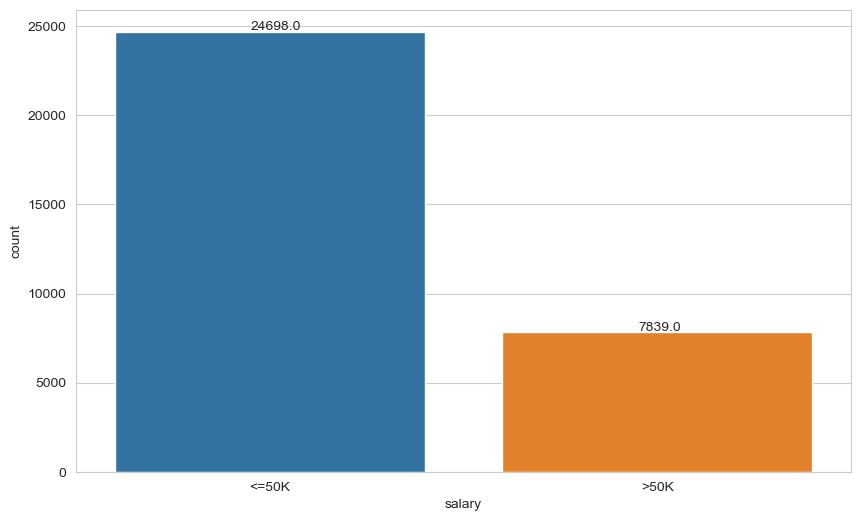

In [186]:
ax, fig = plt.subplots()

ax = sns.countplot(x="salary", data=df)

for p in ax.patches:
    ax.annotate((p.get_height()),  (p.get_x()+0.35, p.get_height()+100));


**The percentage of person in each "salary" levels and visualize it with a pieplot**

In [187]:
df.salary.value_counts(normalize=True)

salary
<=50K   0.759
>50K    0.241
Name: proportion, dtype: float64

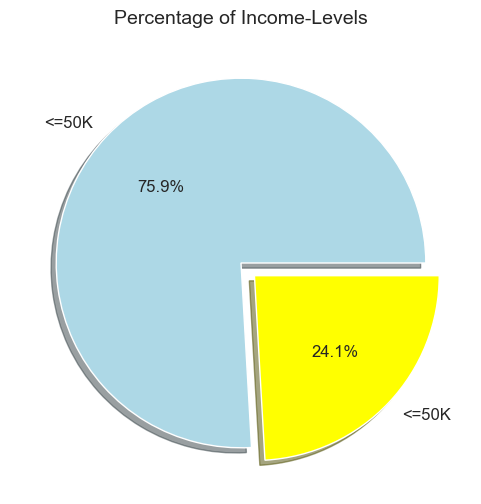

In [188]:
fig, ax = plt.subplots(figsize=(6,6))

ax = plt.pie(x=df.salary.value_counts().values,
       explode=[0,0.1],
       colors=["lightblue", "yellow"],
            shadow=True,
            autopct="%.1f%%",
            labels=[df.salary[0], df.salary[1]],
            textprops={"fontsize":12})

plt.title("Percentage of Income-Levels", fontsize=14);

## Conclusions
From the previous result, it seems 75.9% of the citizens are at the low-income level, 24.1% are at the high-income level.

## Numeric Features

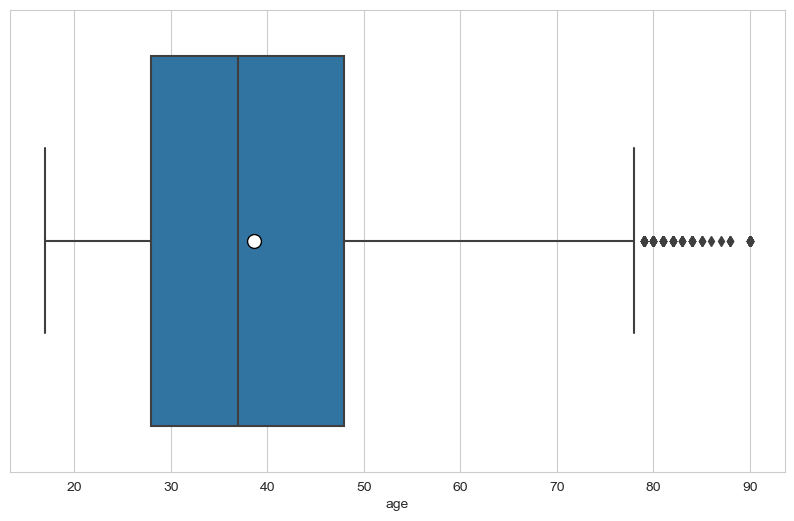

In [189]:
sns.boxplot(x=df.age, showmeans=True, meanprops={"marker":"o",
                                                "markerfacecolor":"white",
                                                "markeredgecolor":"black",
                                                "markersize":"10"});

**The histplot/kdeplot to see distribution of feature**

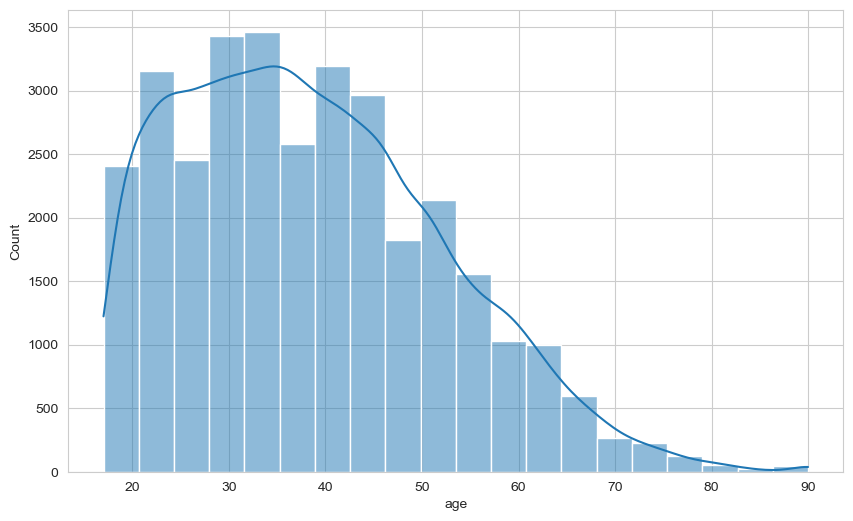

In [190]:
sns.histplot(x=df.age, kde=True, bins=20);

**The statistical values**

In [191]:
df.age.describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

**The boxplot and histplot/kdeplot by "salary" levels**

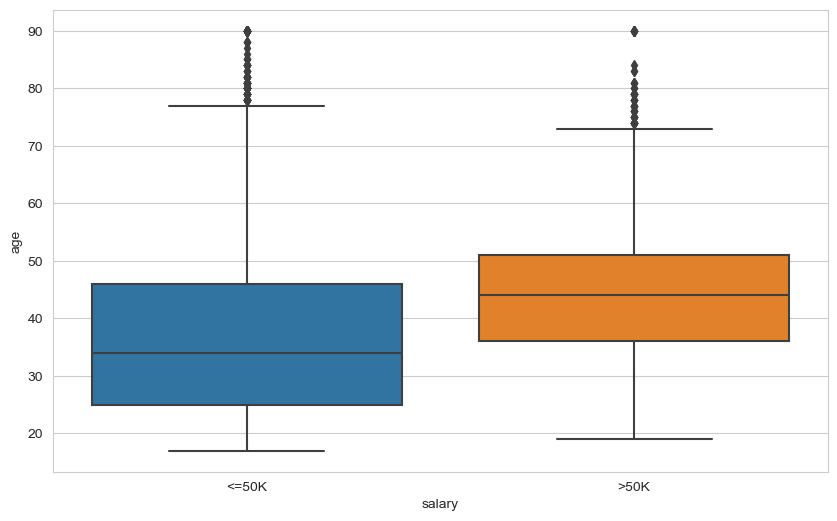

In [192]:
sns.boxplot(x=df.salary, y=df.age);

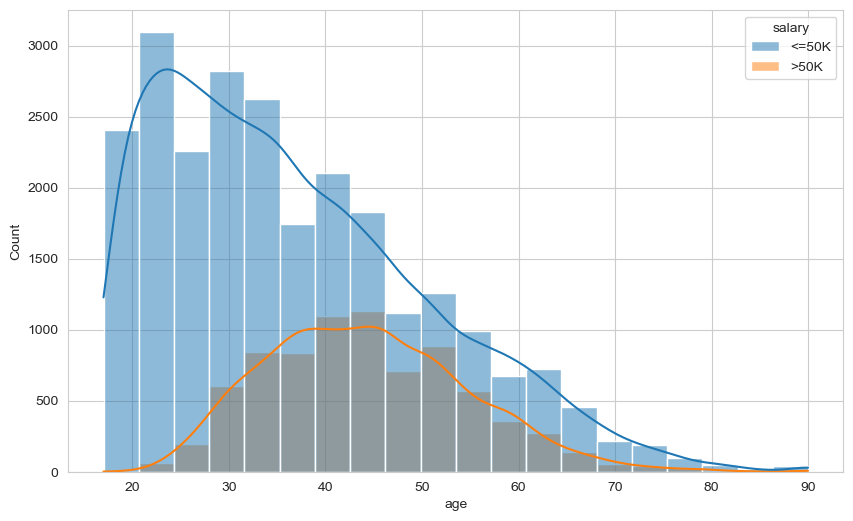

In [193]:
sns.histplot(x=df.age, kde=True, bins=20, hue=df.salary);

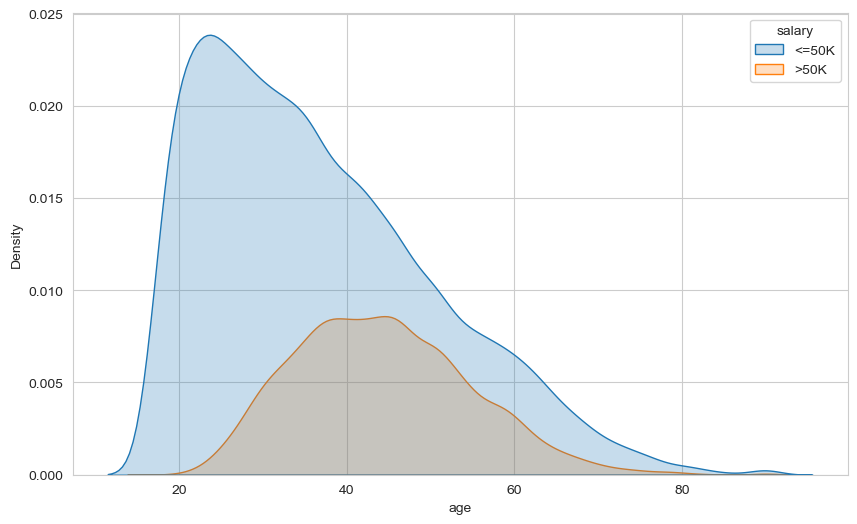

In [194]:
sns.kdeplot(x=df.age, hue=df.salary, fill=True);

**The statistical values by "salary" levels**

In [195]:
df.groupby("salary").age.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,36.787,14.017,17.000,25.000,34.000,46.000,90.000
>50K,7839.000,44.251,10.520,19.000,36.000,44.000,51.000,90.000


## Conclusions
1. The age hs strong relationship with salary
2. The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young

## fnlwgt

**Check the boxplot to see extreme values**

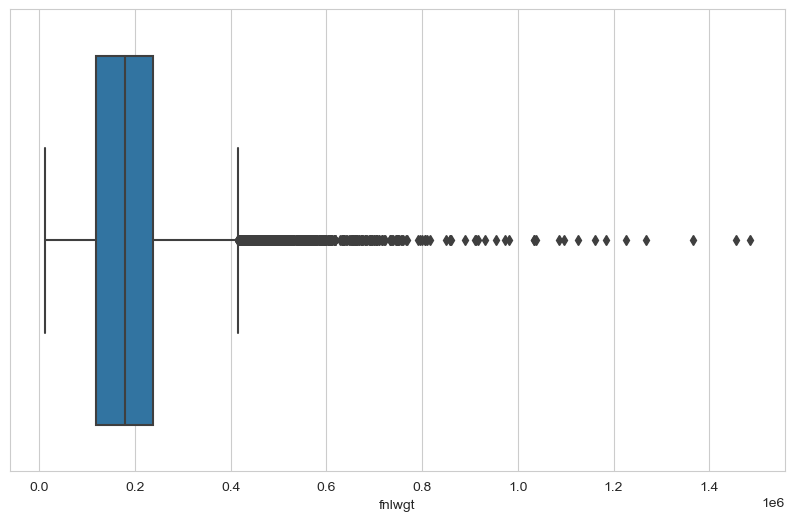

In [196]:
sns.boxplot(x=df.fnlwgt);

**Check the histplot/kdeplot to see distribution of feature**

<Axes: xlabel='fnlwgt', ylabel='Density'>

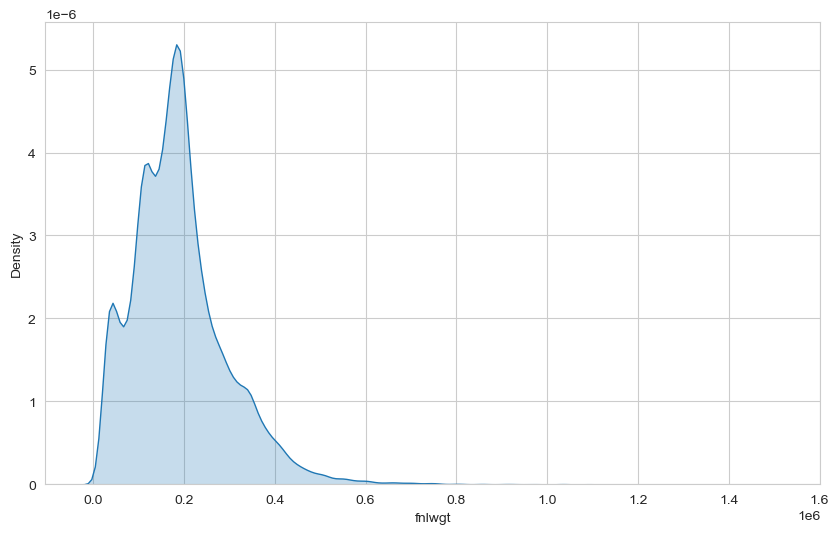

In [197]:
sns.kdeplot(x=df.fnlwgt, fill=True)

**Check the statistical values**

In [198]:
df.fnlwgt.describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

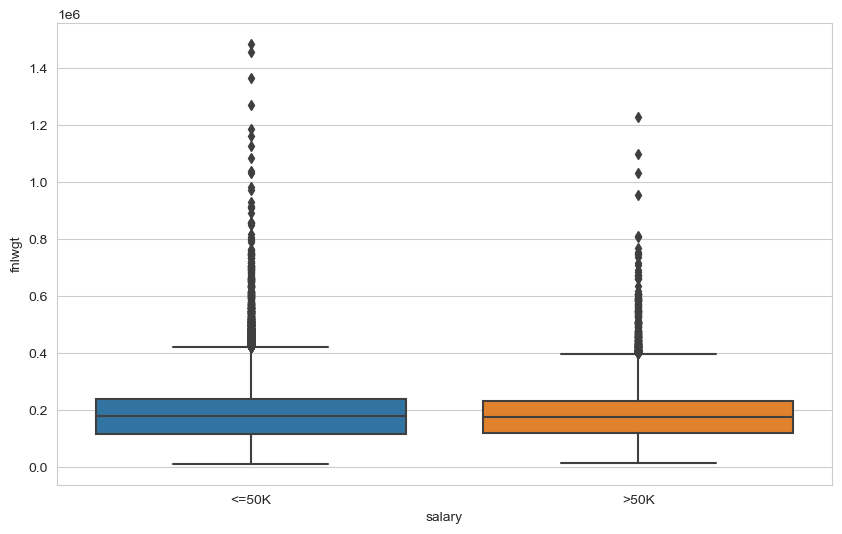

In [199]:
sns.boxplot(x=df.salary, y=df.fnlwgt);

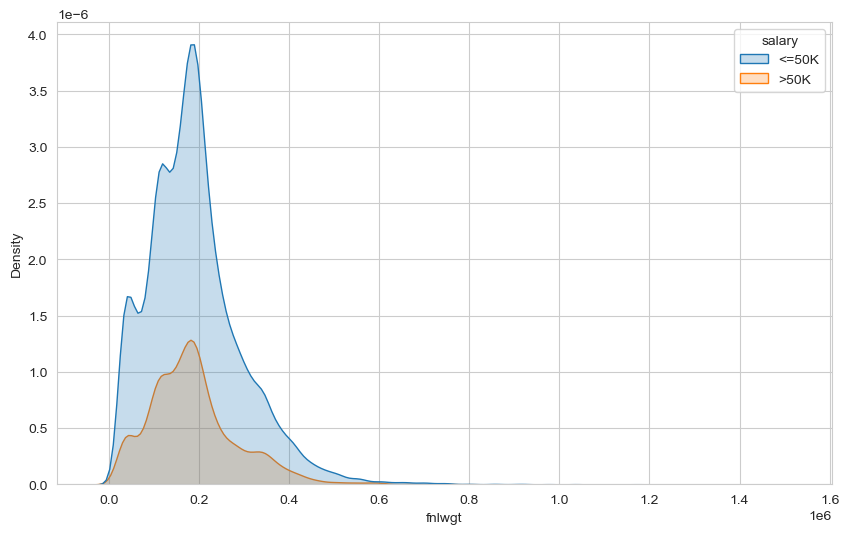

In [200]:
sns.kdeplot(x=df.fnlwgt,fill=True, hue=df.salary);

**Check the statistical values by "salary" levels**

In [201]:
df.groupby("salary").fnlwgt.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,190345.927,106487.413,12285.000,117606.000,179465.000,238968.250,1484705.000
>50K,7839.000,188000.481,102554.464,14878.000,119100.000,176063.000,230969.000,1226583.000


## Conclusion
There is no significant difference between high and low-income groups according to the "fnlwgt" feature.

## capital_gain

**Check the boxplot to see extreme values**

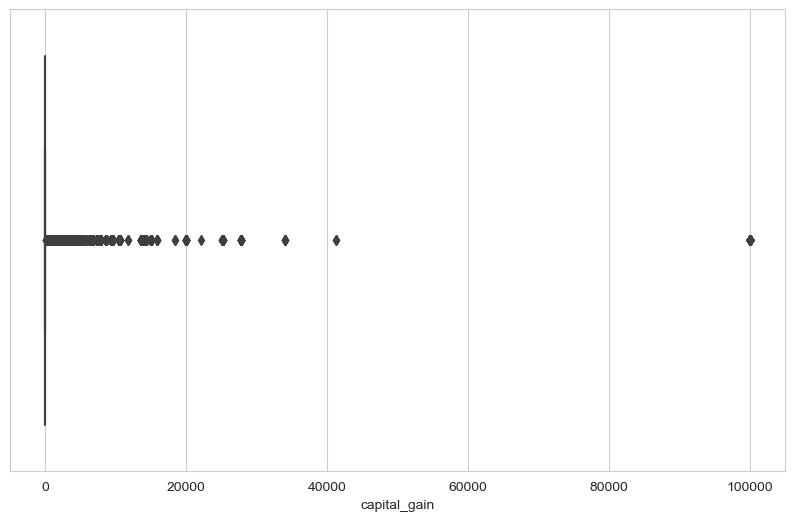

In [202]:
sns.boxplot(x=df.capital_gain);

**Check the histplot/kdeplot to see distribution of feature**

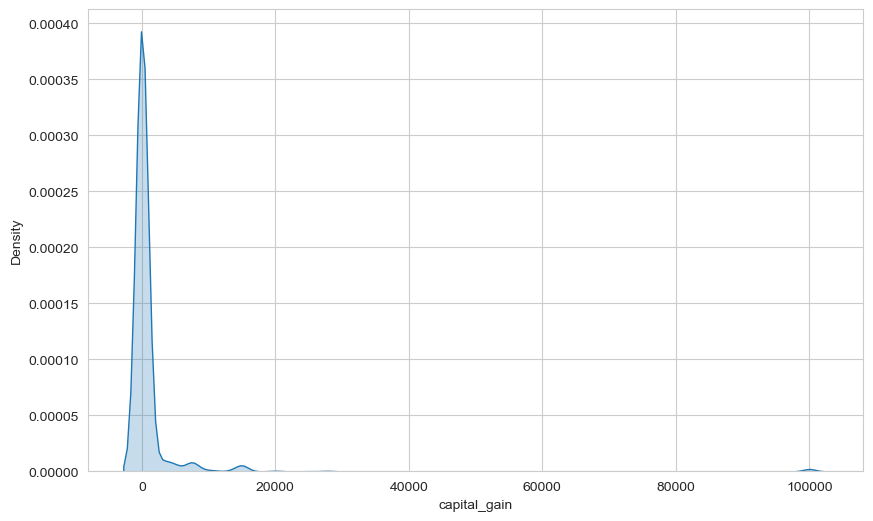

In [203]:
sns.kdeplot(x=df.capital_gain, fill=True);

**Check the statistical values**

In [204]:
df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

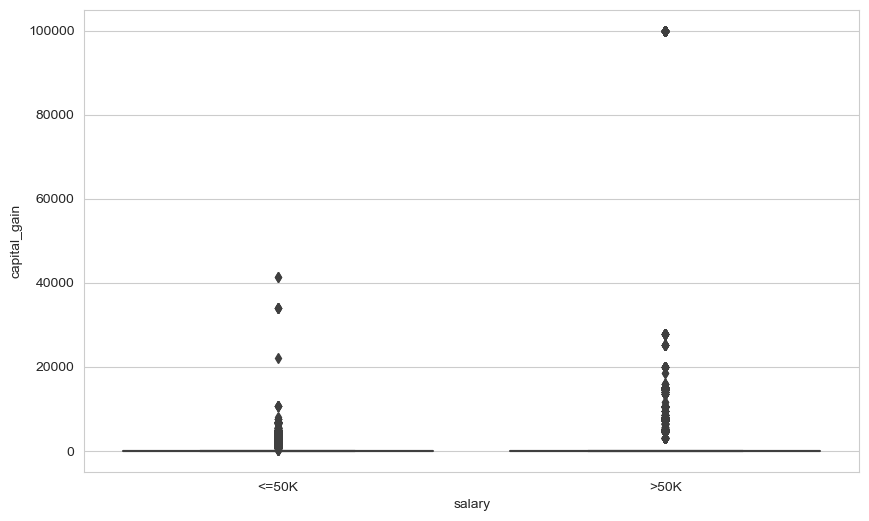

In [205]:
sns.boxplot(y=df.capital_gain, x=df.salary);


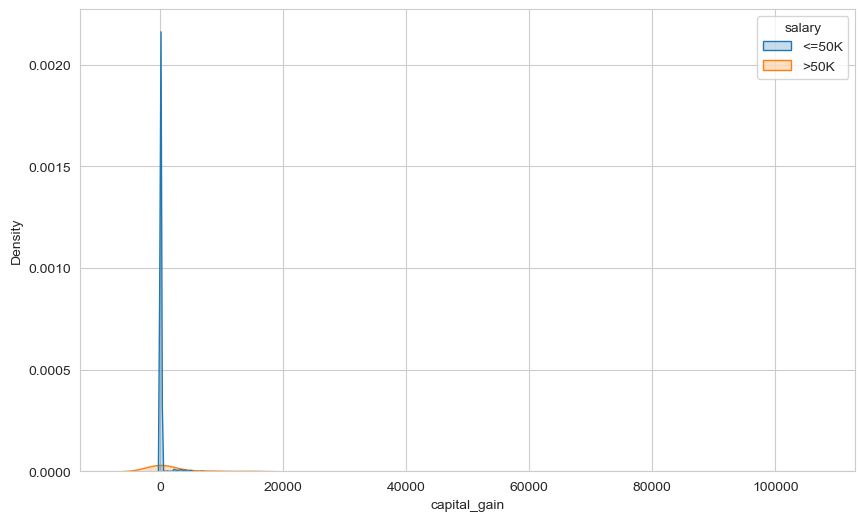

In [206]:
sns.kdeplot(x=df.capital_gain, hue=df.salary,fill=True);

**Check the statistical values by "salary" levels**

In [207]:
df.groupby("salary").capital_gain.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,148.885,963.558,0.000,0.000,0.000,0.000,41310.000
>50K,7839.000,4007.165,14572.097,0.000,0.000,0.000,0.000,99999.000


**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [208]:
df[df.capital_gain != 0].groupby("salary").capital_gain.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.000,3552.813,3173.419,114.000,2202.000,3273.000,4101.000,41310.000
>50K,1677.000,18731.165,26778.676,3103.000,7298.000,7896.000,15024.000,99999.000


## Conclusion
The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".

## capital_loss

**Check the statistical values**

In [209]:
df.capital_loss.describe()

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

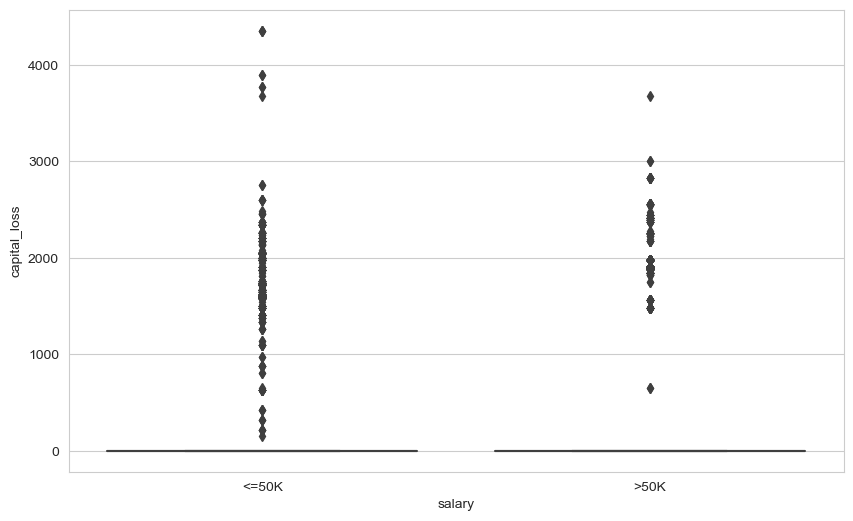

In [210]:
sns.boxplot(x=df.salary, y=df.capital_loss);

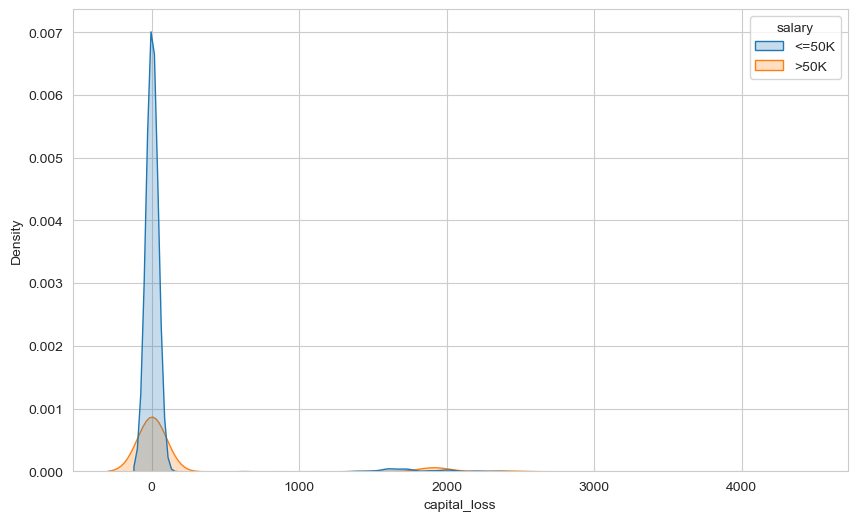

In [211]:
sns.kdeplot(x=df.capital_loss, hue=df.salary, fill=True);

**Check the statistical values by "salary" levels**

In [212]:
df.groupby("salary").capital_loss.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,53.190,310.890,0.000,0.000,0.000,0.000,4356.000
>50K,7839.000,195.051,595.555,0.000,0.000,0.000,0.000,3683.000


**Check the statistical values by "salary" levels for capital_loss not equel the zero**

In [213]:
df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.000,1760.983,438.906,155.000,1590.000,1721.000,1980.000,4356.000
>50K,773.000,1978.017,264.144,653.000,1887.000,1902.000,1977.000,3683.000


## Conclusion
There is no significant difference between high and low-income groups according to the "capital_loss" feature.

## hours_per_week

**Check the boxplot to see extreme values**

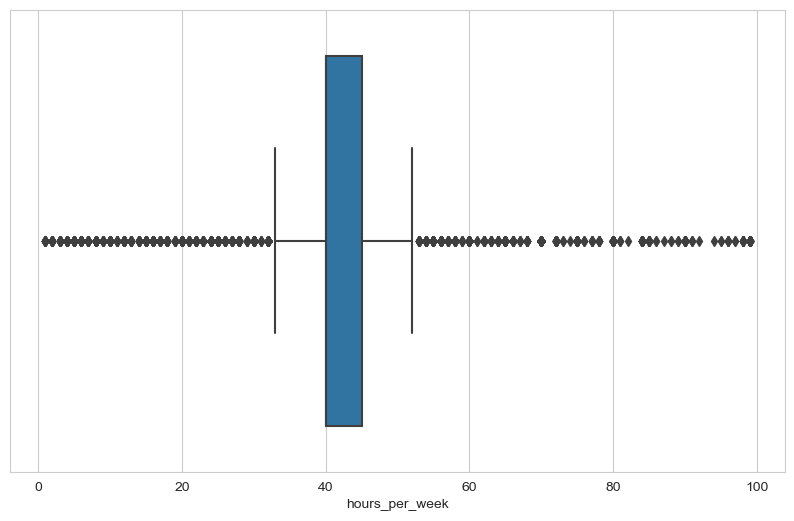

In [214]:
sns.boxplot(x=df.hours_per_week);

**Check the histplot/kdeplot to see distribution of feature**

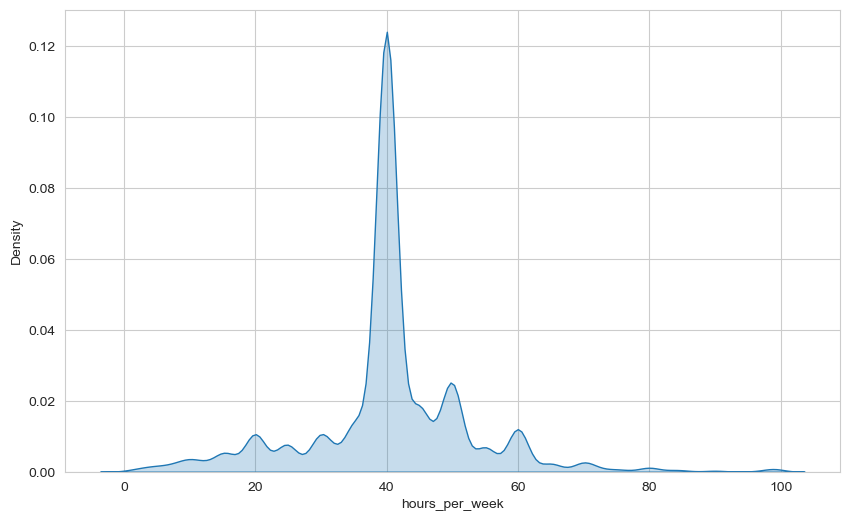

In [215]:
sns.kdeplot(x=df.hours_per_week, fill=True);

**Check the statistical values**

In [216]:
df.hours_per_week.describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

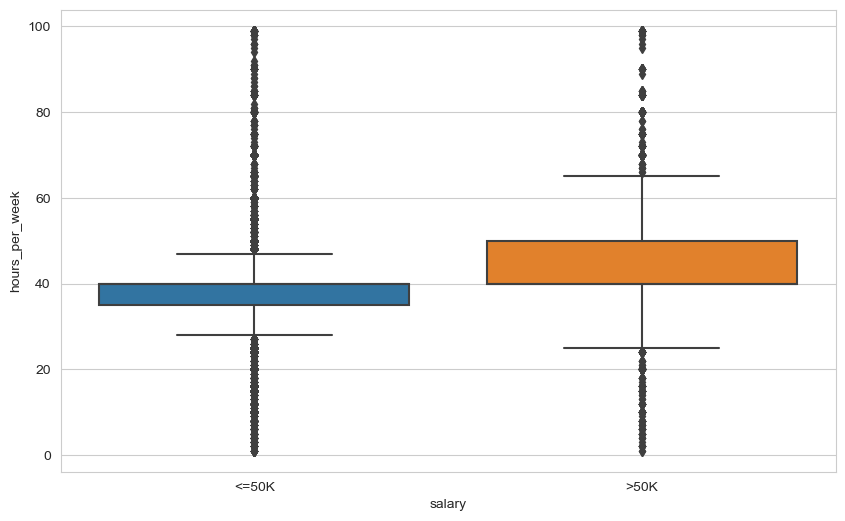

In [217]:
sns.boxplot(x=df.salary, y=df.hours_per_week);

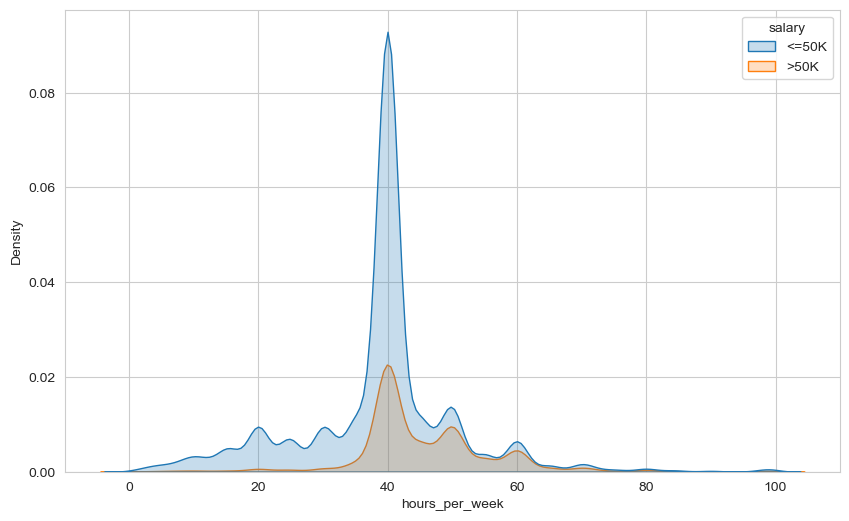

In [218]:
sns.kdeplot(x=df.hours_per_week, hue=df.salary, fill=True);

**Check the statistical values by "salary" levels**

In [219]:
df.groupby("salary").hours_per_week.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,38.843,12.318,1.000,35.000,40.000,40.000,99.000
>50K,7839.000,45.473,11.014,1.000,40.000,40.000,50.000,99.000


## Conclusion
To be in a high-income group, almost at least 40 hours working per week is required. Most of those who work less than 40 hours per week are in the low-income group.

**Visualize the count of person in each categories for these new marital status (married, unmarried)**

## workclass

**Check the count of person in each categories and visualize it with countplot**

In [220]:
df.workclass.value_counts(dropna=False)

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

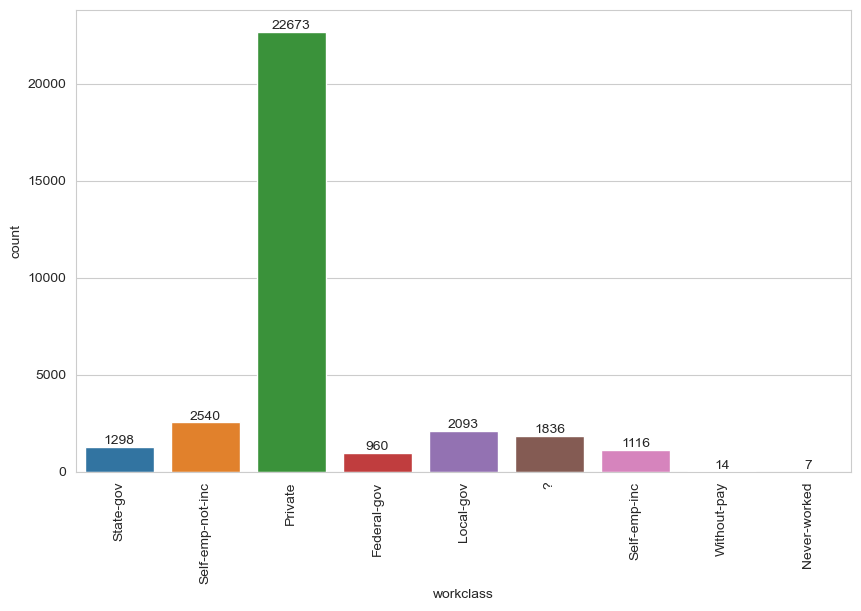

In [221]:
ax=sns.countplot(x=df.workclass)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container)

**Replace the value "?" to the value "Unknown"** 

In [222]:
# Replace "?" values with "Unkown"
df.workclass.replace({"?":"Unknown"}, inplace=True)

**Check the count of person in each "salary" levels by workclass groups and visualize it with countplot**

In [223]:
df.groupby("workclass").salary.value_counts(dropna=False)

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: count, dtype: int64

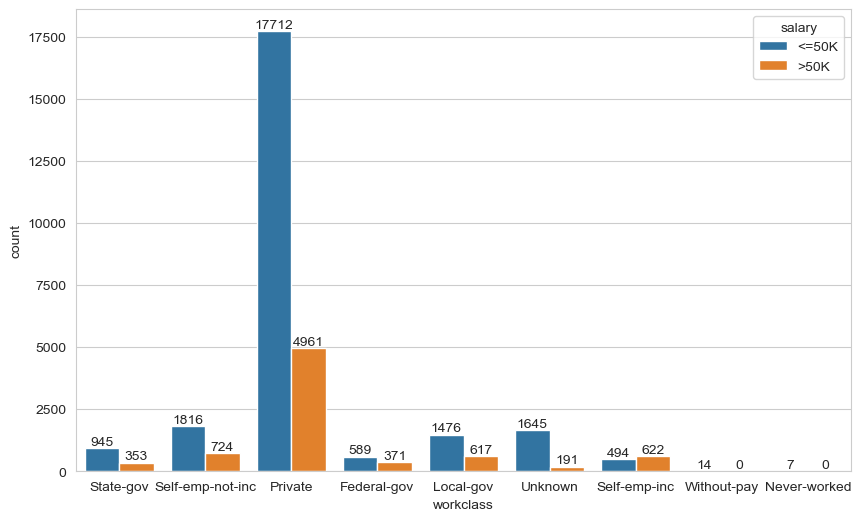

In [224]:
ax=sns.countplot(x=df.workclass, hue=df.salary)
for container in ax.containers:
    ax.bar_label(container)

**Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot**

In [225]:
workclass = df.groupby("workclass").salary.value_counts(dropna=False, normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: proportion, dtype: float64

In [226]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"salary":"percentage"}, inplace=True)
workclass_df.reset_index(inplace=True)
workclass_df.sort_values(by =["workclass", "salary"], inplace=True)
workclass_df

,workclass,salary,proportion
0,Federal-gov,<=50K,0.614
1,Federal-gov,>50K,0.386
2,Local-gov,<=50K,0.705
3,Local-gov,>50K,0.295
4,Never-worked,<=50K,1.000
5,Private,<=50K,0.781
6,Private,>50K,0.219
8,Self-emp-inc,<=50K,0.443
7,Self-emp-inc,>50K,0.557
9,Self-emp-not-inc,<=50K,0.715


In [227]:
sal = df.groupby("salary")["education"].value_counts() / (df.groupby("salary")["education"]).count()
sal
sal_table = pd.DataFrame(sal)
sal_table


0
salary education         
<=50K  HS-grad      0.357
       Some-college 0.239
       Bachelors    0.127
       11th         0.045
       Assoc-voc    0.041
       10th         0.035
       Assoc-acdm   0.032
       Masters      0.031
       7th-8th      0.024
       9th          0.020
       12th         0.016
       5th-6th      0.013
       1st-4th      0.006
       Prof-school  0.006
       Doctorate    0.004
       Preschool    0.002
>50K   Bachelors    0.283
       HS-grad      0.214
       Some-college 0.177
       Masters      0.122
       Prof-school  0.054
       Assoc-voc    0.046
       Doctorate    0.039
       Assoc-acdm   0.034
       10th         0.008
       11th         0.008
       7th-8th      0.005
       12th         0.004
       9th          0.003
       5th-6th      0.002
       1st-4th      0.001

**Check the count of person in each workclass groups by "salary" levels and visualize it with countplot**

In [228]:
df.groupby("salary").workclass.value_counts(dropna=False)

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: count, dtype: int64

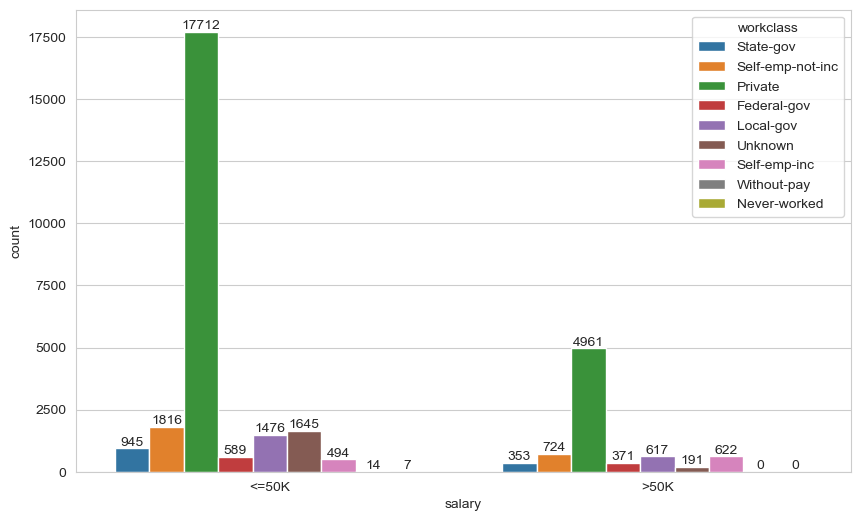

In [229]:
ax = sns.countplot(x=df.salary, hue=df.workclass)

for container in ax.containers:
    ax.bar_label(container)

**Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot**

In [230]:
workclass = df.groupby("salary").workclass.value_counts(dropna=False, normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: proportion, dtype: float64

In [231]:
workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"workclass":"percentage"}, inplace=True)
workclass_df.reset_index(inplace=True)
workclass_df.sort_values(by=["salary", "workclass"], inplace=True)
workclass_df

,salary,workclass,proportion
5,<=50K,Federal-gov,0.024
3,<=50K,Local-gov,0.060
8,<=50K,Never-worked,0.000
0,<=50K,Private,0.717
6,<=50K,Self-emp-inc,0.020
1,<=50K,Self-emp-not-inc,0.074
4,<=50K,State-gov,0.038
2,<=50K,Unknown,0.067
7,<=50K,Without-pay,0.001
13,>50K,Federal-gov,0.047


## Conclusion
"Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the high-income group about high-level income.

## native_country

**Check the count of person in each categories and visualize it with countplot**

In [232]:
df.native_country.value_counts(dropna=False)

native_country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

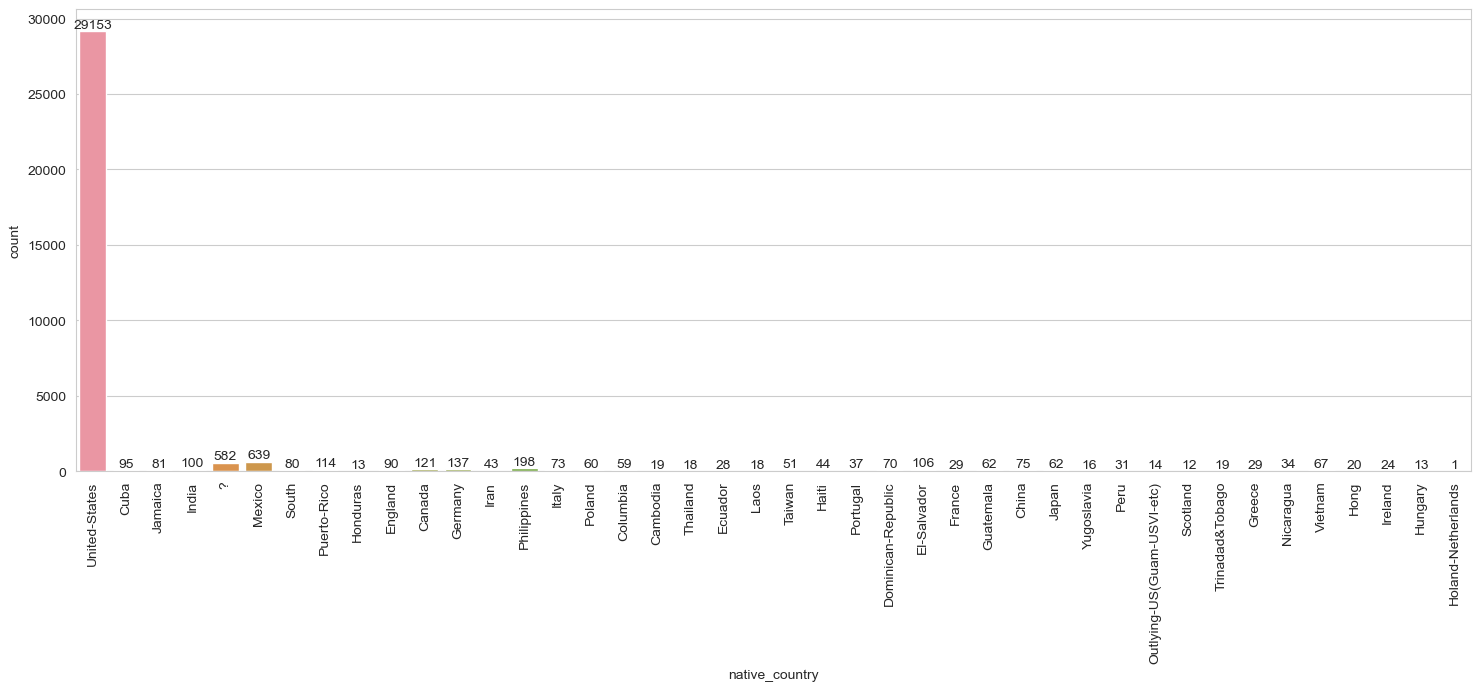

In [233]:
plt.figure(figsize=(18,6))

ax=sns.countplot(x=df.native_country)

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container)

**Replace the value "?" to the value "Unknown"** 

In [234]:
df.native_country.replace("?", "Unknown", inplace=True)

**Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data**

In [235]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [236]:
df.native_country.apply(mapping_native_country).value_counts(dropna=False)

native_country
US        29153
Others     3384
Name: count, dtype: int64

In [237]:
# By using "mapping_native_country" def function above, create a new column named "native_country_summary"
df["native_country_summary"]=df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

**Visualize the count of person in each new categories (US, Others)**

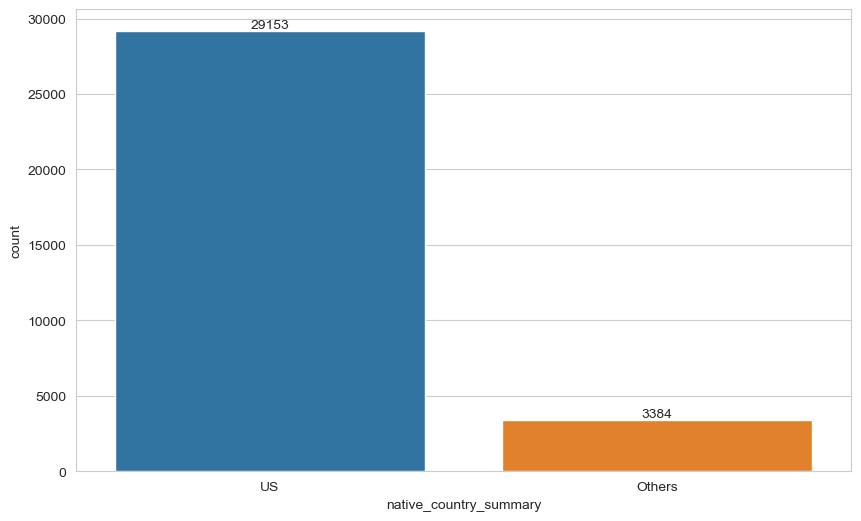

In [238]:
ax=sns.countplot(x=df.native_country_summary)

for container in ax.containers:
    ax.bar_label(container)

**Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot**

In [239]:
df.groupby("native_country_summary").salary.value_counts(dropna=False)

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: count, dtype: int64

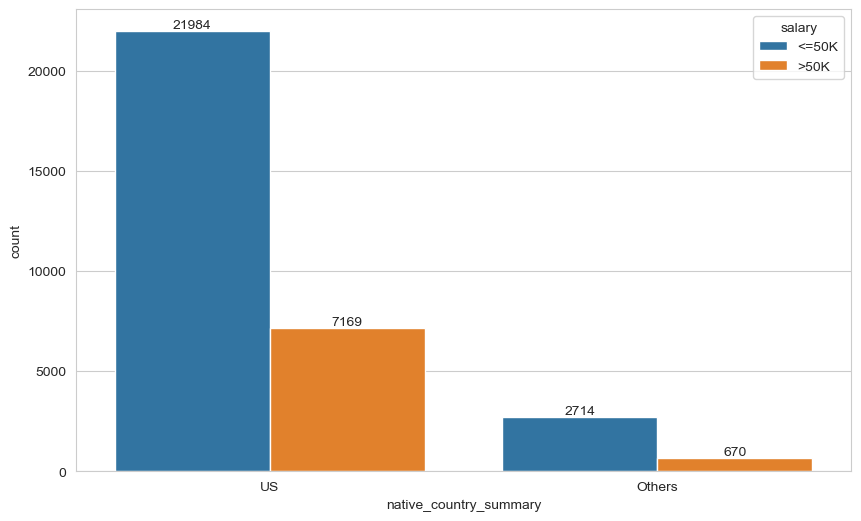

In [240]:
ax = sns.countplot(x=df.native_country_summary, hue=df.salary)

for container in ax.containers:
    ax.bar_label(container)

**Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately**

In [241]:
country = df.groupby("native_country_summary").salary.value_counts(dropna=False, normalize=True)
country

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: proportion, dtype: float64

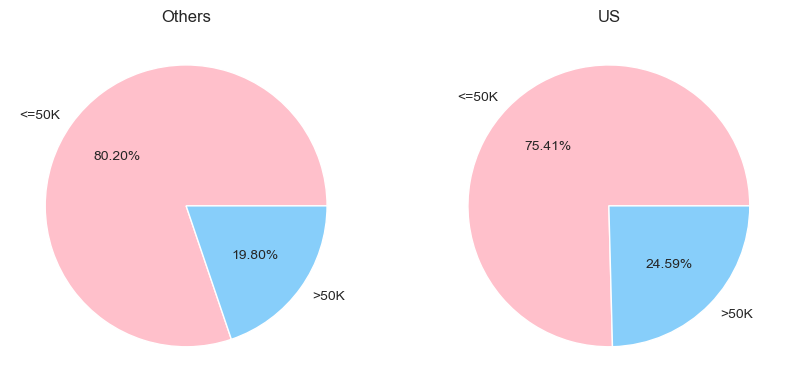

In [242]:
fig, axes = plt.subplots(1,2)
i = 0

while i!=2:
    
    axes[i].pie(country[2*i:2*i+2],
               colors=["pink","lightskyblue"],
               autopct="%.2f%%",
               labels=["<=50K", ">50K"])
    axes[i].set_title(country.index[i*2][0])
    i+=1

**Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot**

In [243]:
df.groupby("salary").native_country_summary.value_counts(dropna=False)

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: count, dtype: int64

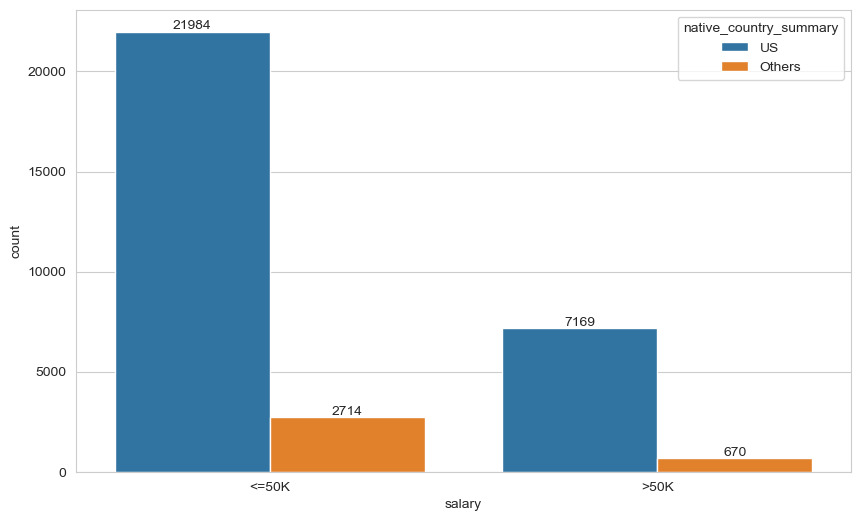

In [244]:
ax = sns.countplot(x=df.salary, hue=df.native_country_summary)

for container in ax.containers:
    ax.bar_label(container)

**Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately**

In [245]:
country=df.groupby("salary").native_country_summary.value_counts(dropna=False, normalize=True)
country

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: proportion, dtype: float64

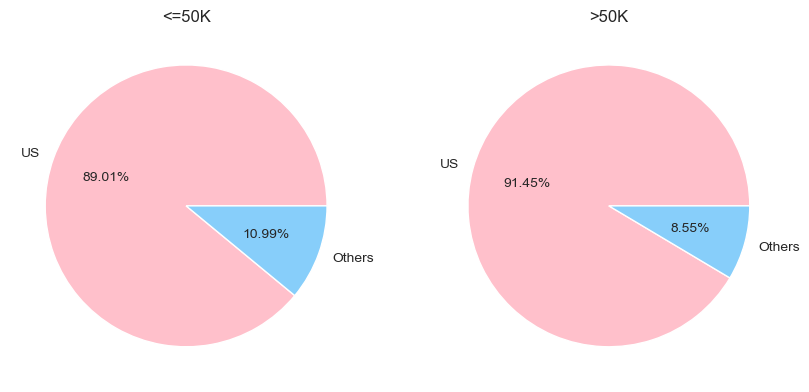

In [246]:
fig, axes = plt.subplots(1,2)
i = 0

while i!=2:
    
    axes[i].pie(country[2*i:2*i+2],
               colors=["pink","lightskyblue"],
               autopct="%.2f%%",
               labels=["US", "Others"])
    axes[i].set_title(country.index[i*2][0])
    i+=1

## Conclusion
"United States" has a high ratio of high-level income both in the self group and in the high-income group.

## <p style="font-size:150%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features & Missing Value</p>



In [267]:
df =pd.read_csv("adult_eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [268]:
df.drop(columns=["education", "education-num", "relationship", "marital-status", "native-country"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   capital-loss    32561 non-null  int64 
 8   hours-per-week  32561 non-null  int64 
 9   salary          32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


**Check the missing values for all features basically**

In [269]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

## Conclusion
It seems that there is no missing value. 

**2. Decide if drop these "Unknown" string values or not**

In [270]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [271]:
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [272]:
df[(df.occupation=="Unknown")].workclass.value_counts()

Series([], Name: count, dtype: int64)

In [273]:
# Replace "Unknown" values with NaN using numpy library

df.replace("Unknown", np.nan, inplace=True)

In [274]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

In [275]:
# Drop missing values in df permanently
df.dropna(inplace=True)

In [276]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   capital-loss    32561 non-null  int64 
 8   hours-per-week  32561 non-null  int64 
 9   salary          32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


## Conslusions
1. Compare with previous data set: 5 Unneccessary featrues be dropped
2. There is no missing value be dropped

## <p style="font-size:155%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>


### Boxplot and Histplot for all numeric features

**Plot boxplots for each numeric features at the same figure as subplots**

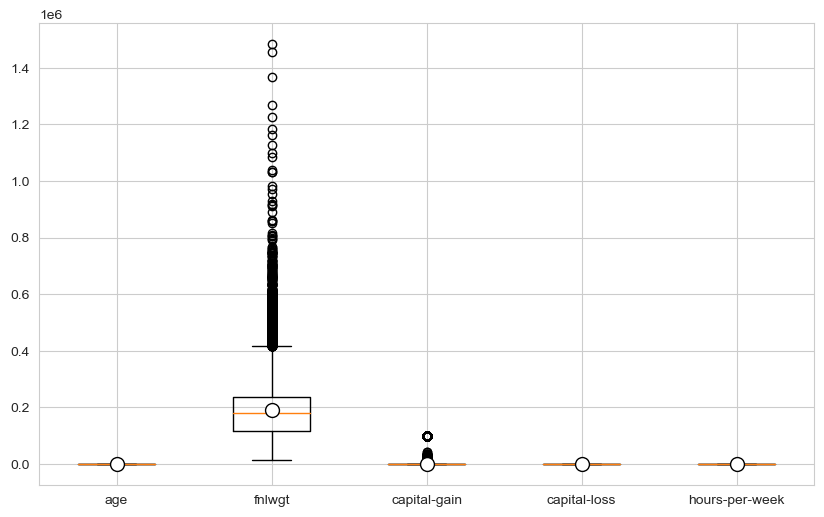

In [278]:
plt.boxplot((df[df.select_dtypes('number').columns]),
              labels=df.select_dtypes('number').columns,
               showmeans=True,
               meanprops={"marker":"o",
                         "markerfacecolor":"white",
                         "markeredgecolor":"black",
                         "markersize":"10"});

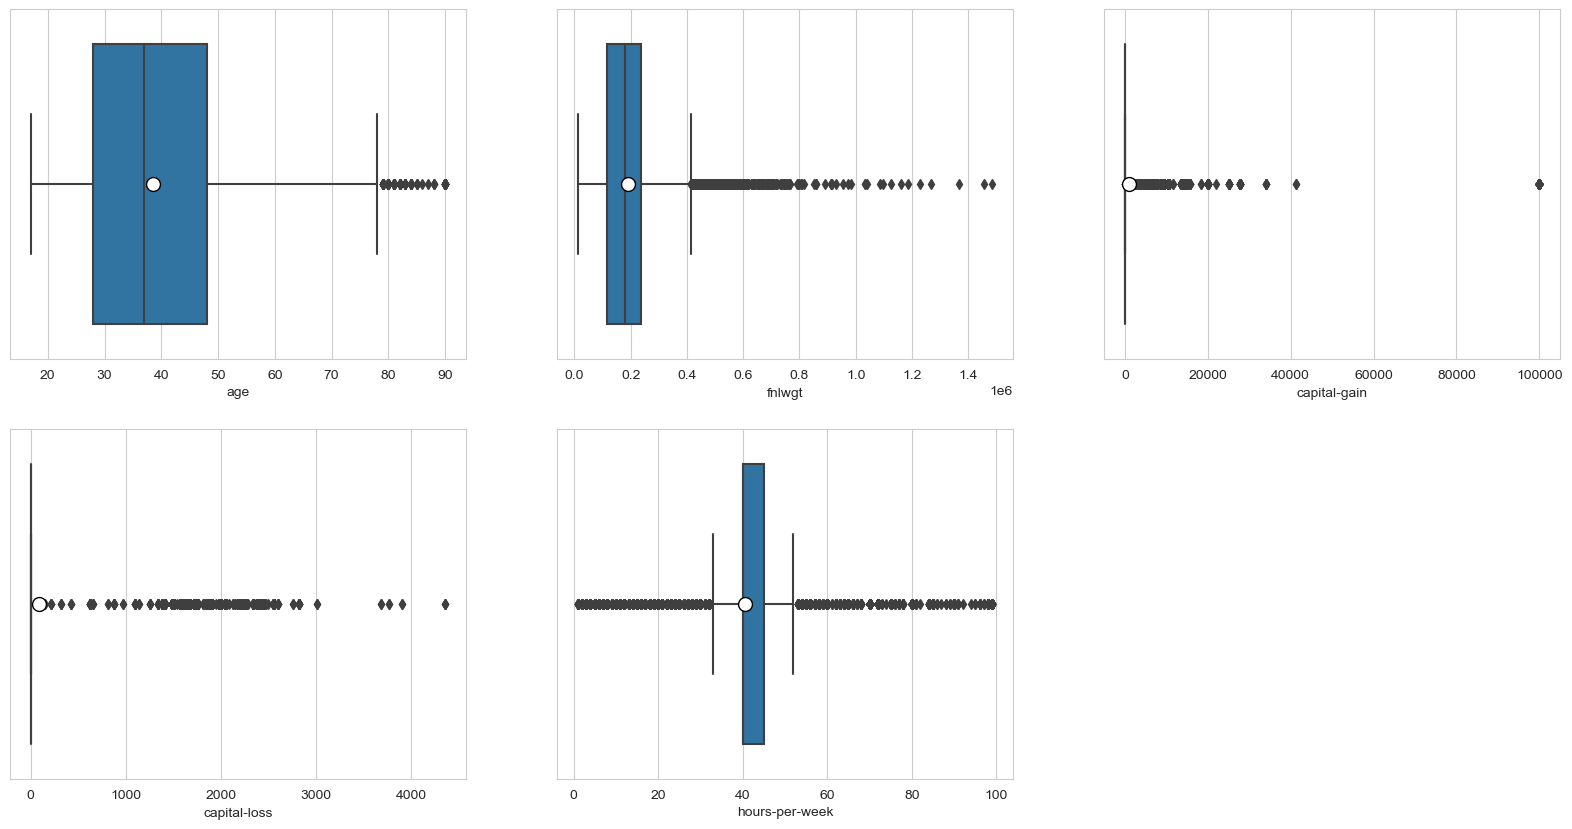

In [280]:
plt.figure(figsize=(20,10))

index=0
for feature in df.select_dtypes("number").columns:
    index+=1
    plt.subplot(2,3,index)

    sns.boxplot(x=feature,
                data=df,
                showmeans=True,
                meanprops={"marker":"o",
                         "markerfacecolor":"white",
                         "markeredgecolor":"black",
                         "markersize":"10"});

**Plot both boxplots and histograms for each numeric features at the same figure as subplots**

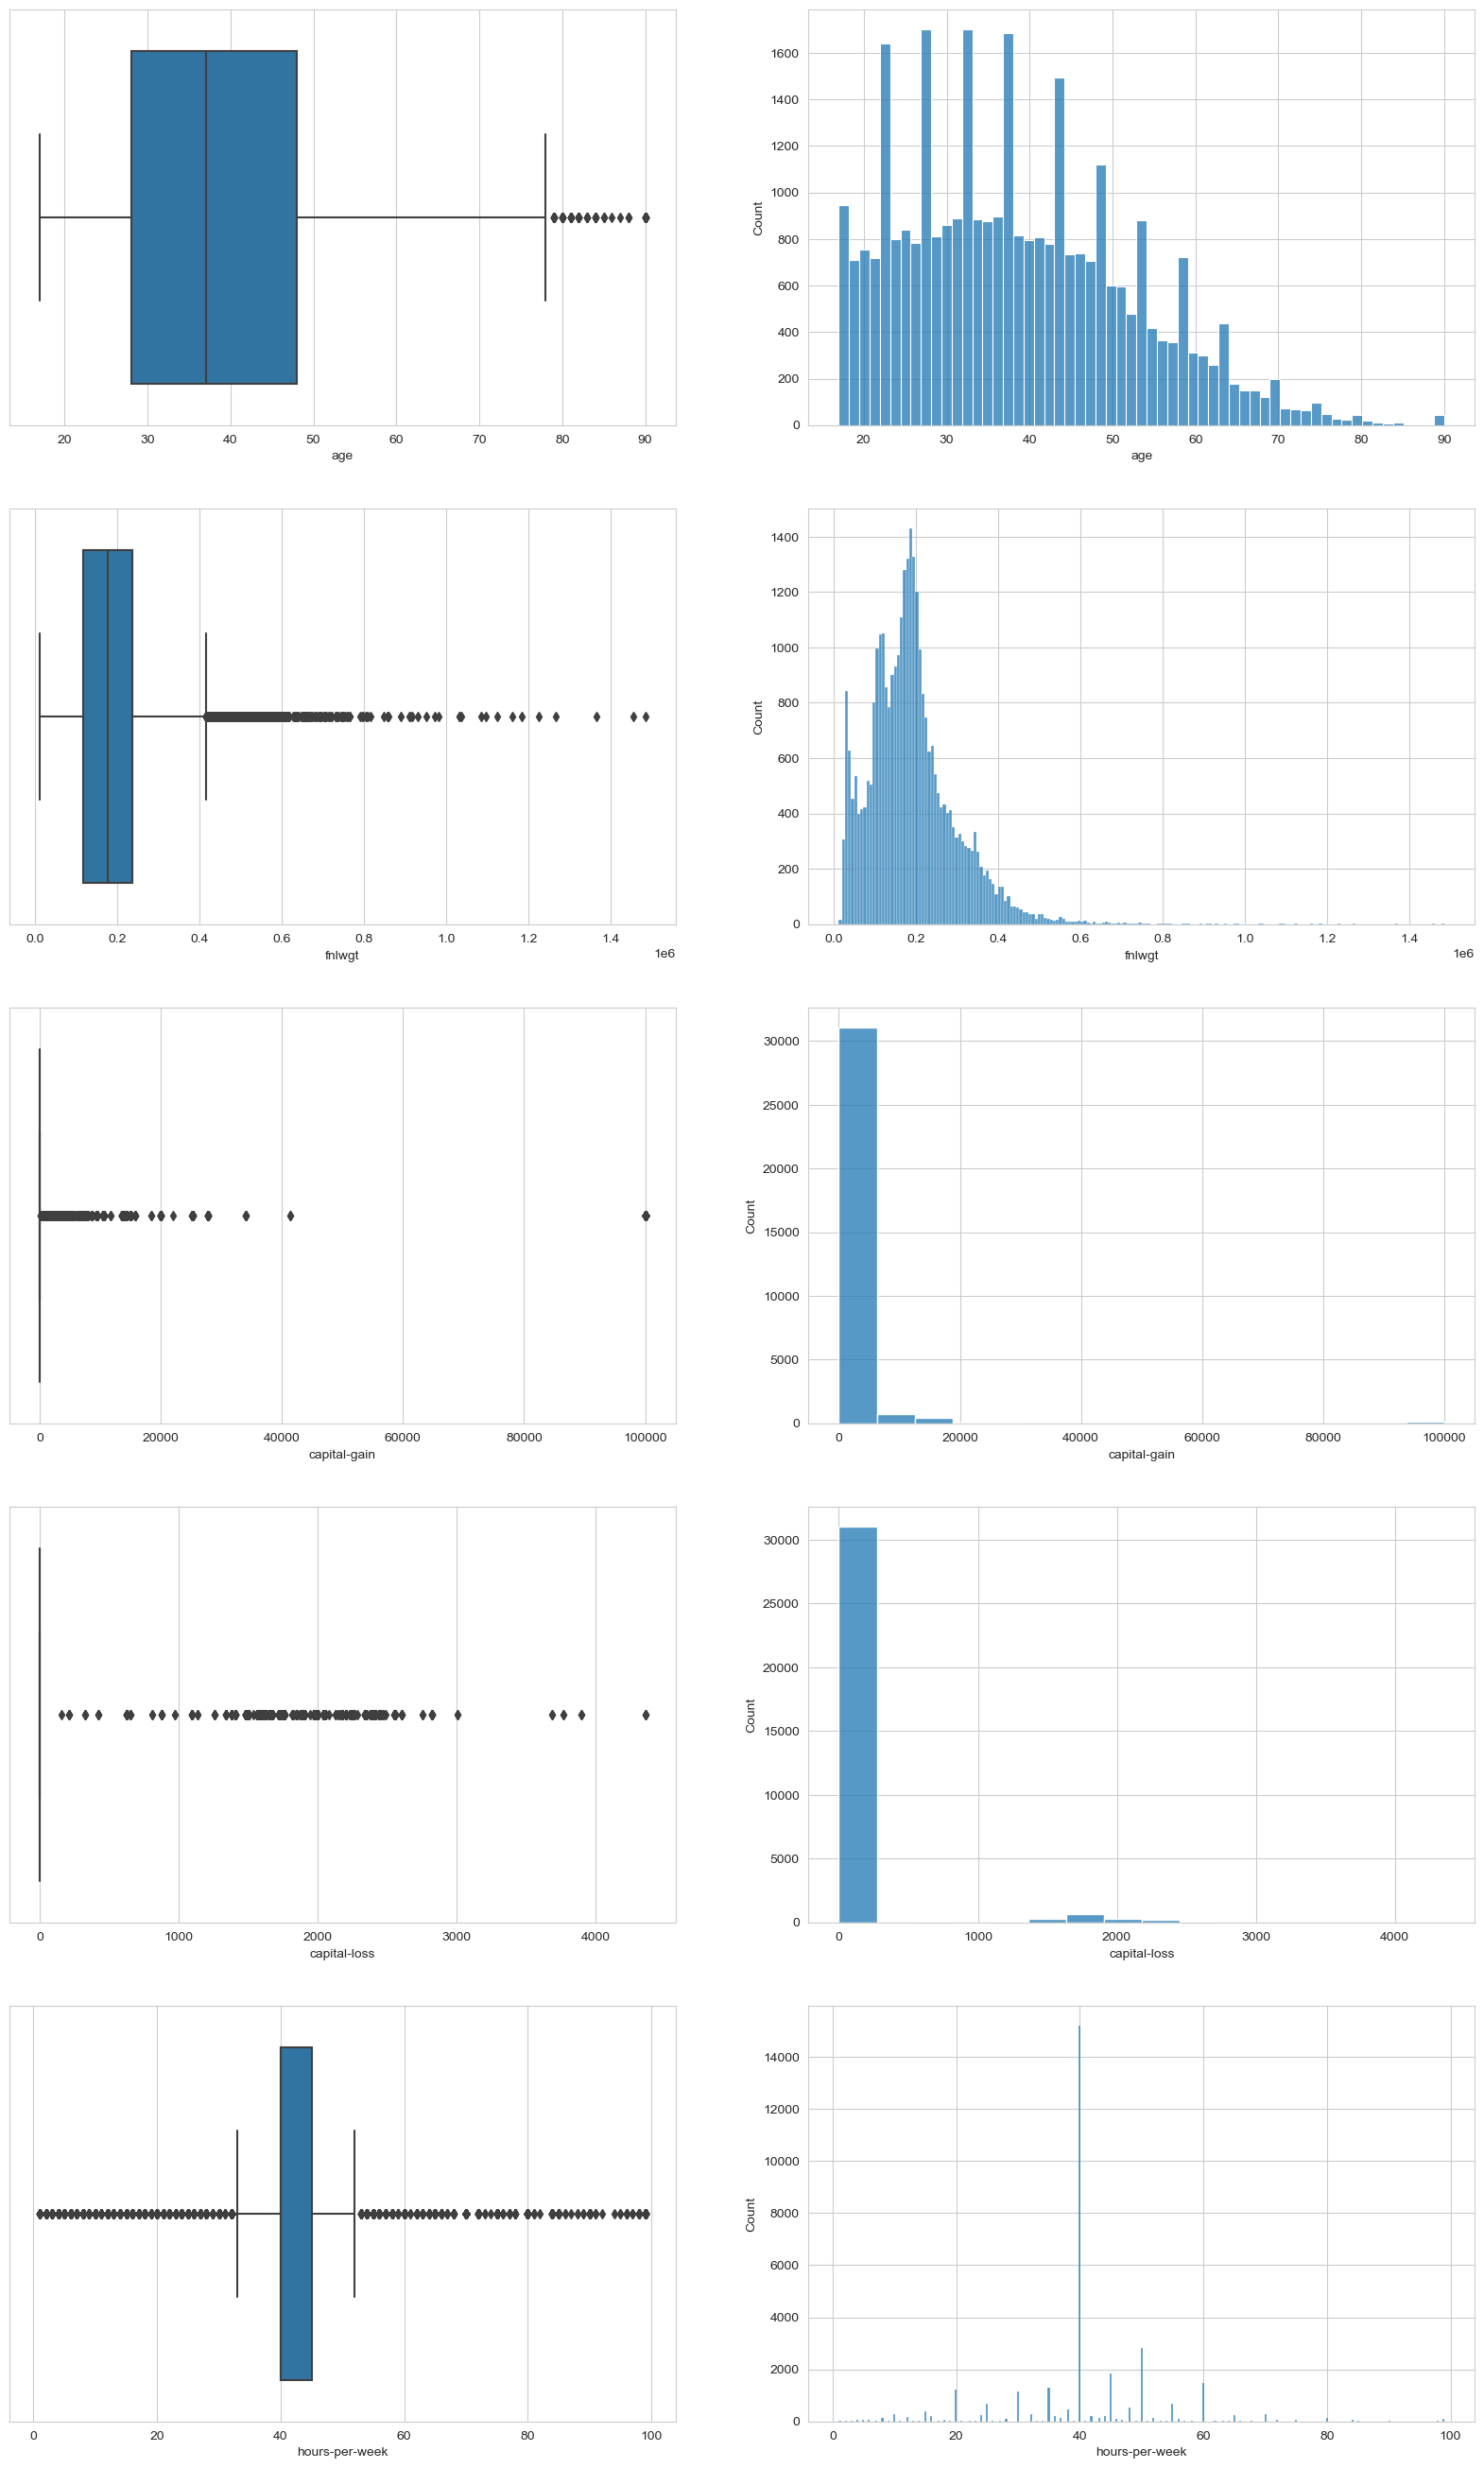

In [281]:
plt.figure(figsize=(20,40))

index=0
for feature in df.select_dtypes("number").columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=feature,data=df)
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

**Check the statistical values for all numeric features**

In [282]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


## Conclusions
1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.
2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.

## <p style="font-size:155%; text-align:center; border-radius:10px 10px;">Make the ready Dataset for ML Models</p>



### 1. Convert all features to numeric

**Convert target feature (salary) to numeric (0 and 1) by using map function**

In [283]:
df["salary"]=df.salary.map({"<=50K":0, ">50K":1})
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [284]:
df["salary"].value_counts()

salary
0    24720
1     7841
Name: count, dtype: int64

**Convert all features to numeric by using get_dummies function**

In [285]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,2174,0,40,0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,50,83311,0,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,38,215646,0,0,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,53,234721,0,0,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,28,338409,0,0,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
32557,40,154374,0,0,40,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
32558,58,151910,0,0,40,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
32559,22,201490,0,0,20,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [286]:
df.shape

(32561, 10)

In [287]:
df_dummy.shape

(32561, 33)

### 2. Take correlation between features by utilizing power of visualizing

In [288]:
df_dummy.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
age,1.000,-0.077,0.078,0.058,0.069,0.234,0.051,0.061,-0.019,-0.198,0.103,0.136,0.013,0.014,-0.043,-0.010,0.013,0.099,0.034,-0.099,-0.016,-0.089,0.016,0.054,0.004,-0.032,-0.020,0.027,-0.011,-0.019,-0.034,0.033,0.089
fnlwgt,-0.077,1.000,0.000,-0.010,-0.019,-0.009,-0.008,-0.003,0.005,0.043,-0.025,-0.039,-0.011,-0.003,0.008,0.004,0.008,-0.019,-0.033,0.029,0.013,-0.004,0.007,-0.016,0.017,0.004,0.004,0.001,-0.051,0.118,0.006,-0.057,0.027
capital-gain,0.078,0.000,1.000,-0.032,0.078,0.223,-0.006,-0.007,-0.002,-0.039,0.097,0.032,-0.010,-0.002,-0.029,-0.002,-0.022,0.061,-0.012,-0.023,-0.026,-0.040,-0.007,0.085,-0.007,0.012,-0.009,-0.018,0.010,-0.021,-0.002,0.014,0.048
capital-loss,0.058,-0.010,-0.032,1.000,0.054,0.151,0.011,0.015,-0.003,-0.027,0.032,0.021,-0.002,-0.004,-0.024,0.005,0.001,0.048,-0.011,-0.022,-0.016,-0.041,-0.011,0.046,-0.003,0.010,0.005,-0.003,0.004,-0.022,-0.006,0.021,0.046
hours-per-week,0.069,-0.019,0.078,0.054,1.000,0.230,0.013,0.012,-0.014,-0.021,0.128,0.094,-0.023,-0.013,-0.084,0.000,0.057,0.139,0.094,-0.042,0.007,-0.156,-0.041,0.060,0.028,0.010,-0.014,0.078,-0.005,-0.053,-0.007,0.049,0.229
salary,0.234,-0.009,0.223,0.151,0.230,1.000,0.059,0.033,-0.008,-0.079,0.139,0.030,0.015,-0.012,-0.090,-0.005,-0.013,0.215,-0.052,-0.087,-0.069,-0.156,-0.037,0.186,0.028,0.024,0.026,-0.021,0.011,-0.089,-0.032,0.085,0.216
workclass_Federal-gov,0.051,-0.008,-0.006,0.011,0.013,0.059,1.000,-0.046,-0.003,-0.264,-0.033,-0.051,-0.036,-0.004,0.117,0.095,-0.031,0.033,-0.022,-0.016,-0.034,-0.037,-0.012,0.029,0.012,-0.054,0.044,-0.019,0.014,0.047,-0.002,-0.051,0.001
workclass_Local-gov,0.061,-0.003,-0.007,0.015,0.012,0.033,-0.046,1.000,-0.004,-0.398,-0.049,-0.076,-0.053,-0.005,0.016,-0.004,-0.044,-0.018,-0.025,-0.026,-0.061,-0.008,-0.018,0.165,0.235,-0.090,-0.016,0.007,-0.020,0.037,-0.010,-0.024,-0.038
workclass_Never-worked,-0.019,0.005,-0.002,-0.003,-0.014,-0.008,-0.003,-0.004,1.000,-0.022,-0.003,-0.004,-0.003,-0.000,-0.005,-0.000,-0.006,-0.006,-0.003,-0.003,-0.004,-0.005,-0.001,-0.006,-0.002,-0.005,-0.003,-0.003,-0.003,0.009,-0.001,-0.006,0.001
workclass_Private,-0.198,0.043,-0.039,-0.027,-0.021,-0.079,-0.264,-0.398,-0.022,1.000,-0.286,-0.441,-0.309,-0.031,0.043,-0.025,0.068,-0.029,-0.092,0.106,0.144,0.098,0.045,-0.115,-0.125,0.084,0.036,0.047,-0.004,-0.000,0.018,0.003,-0.035


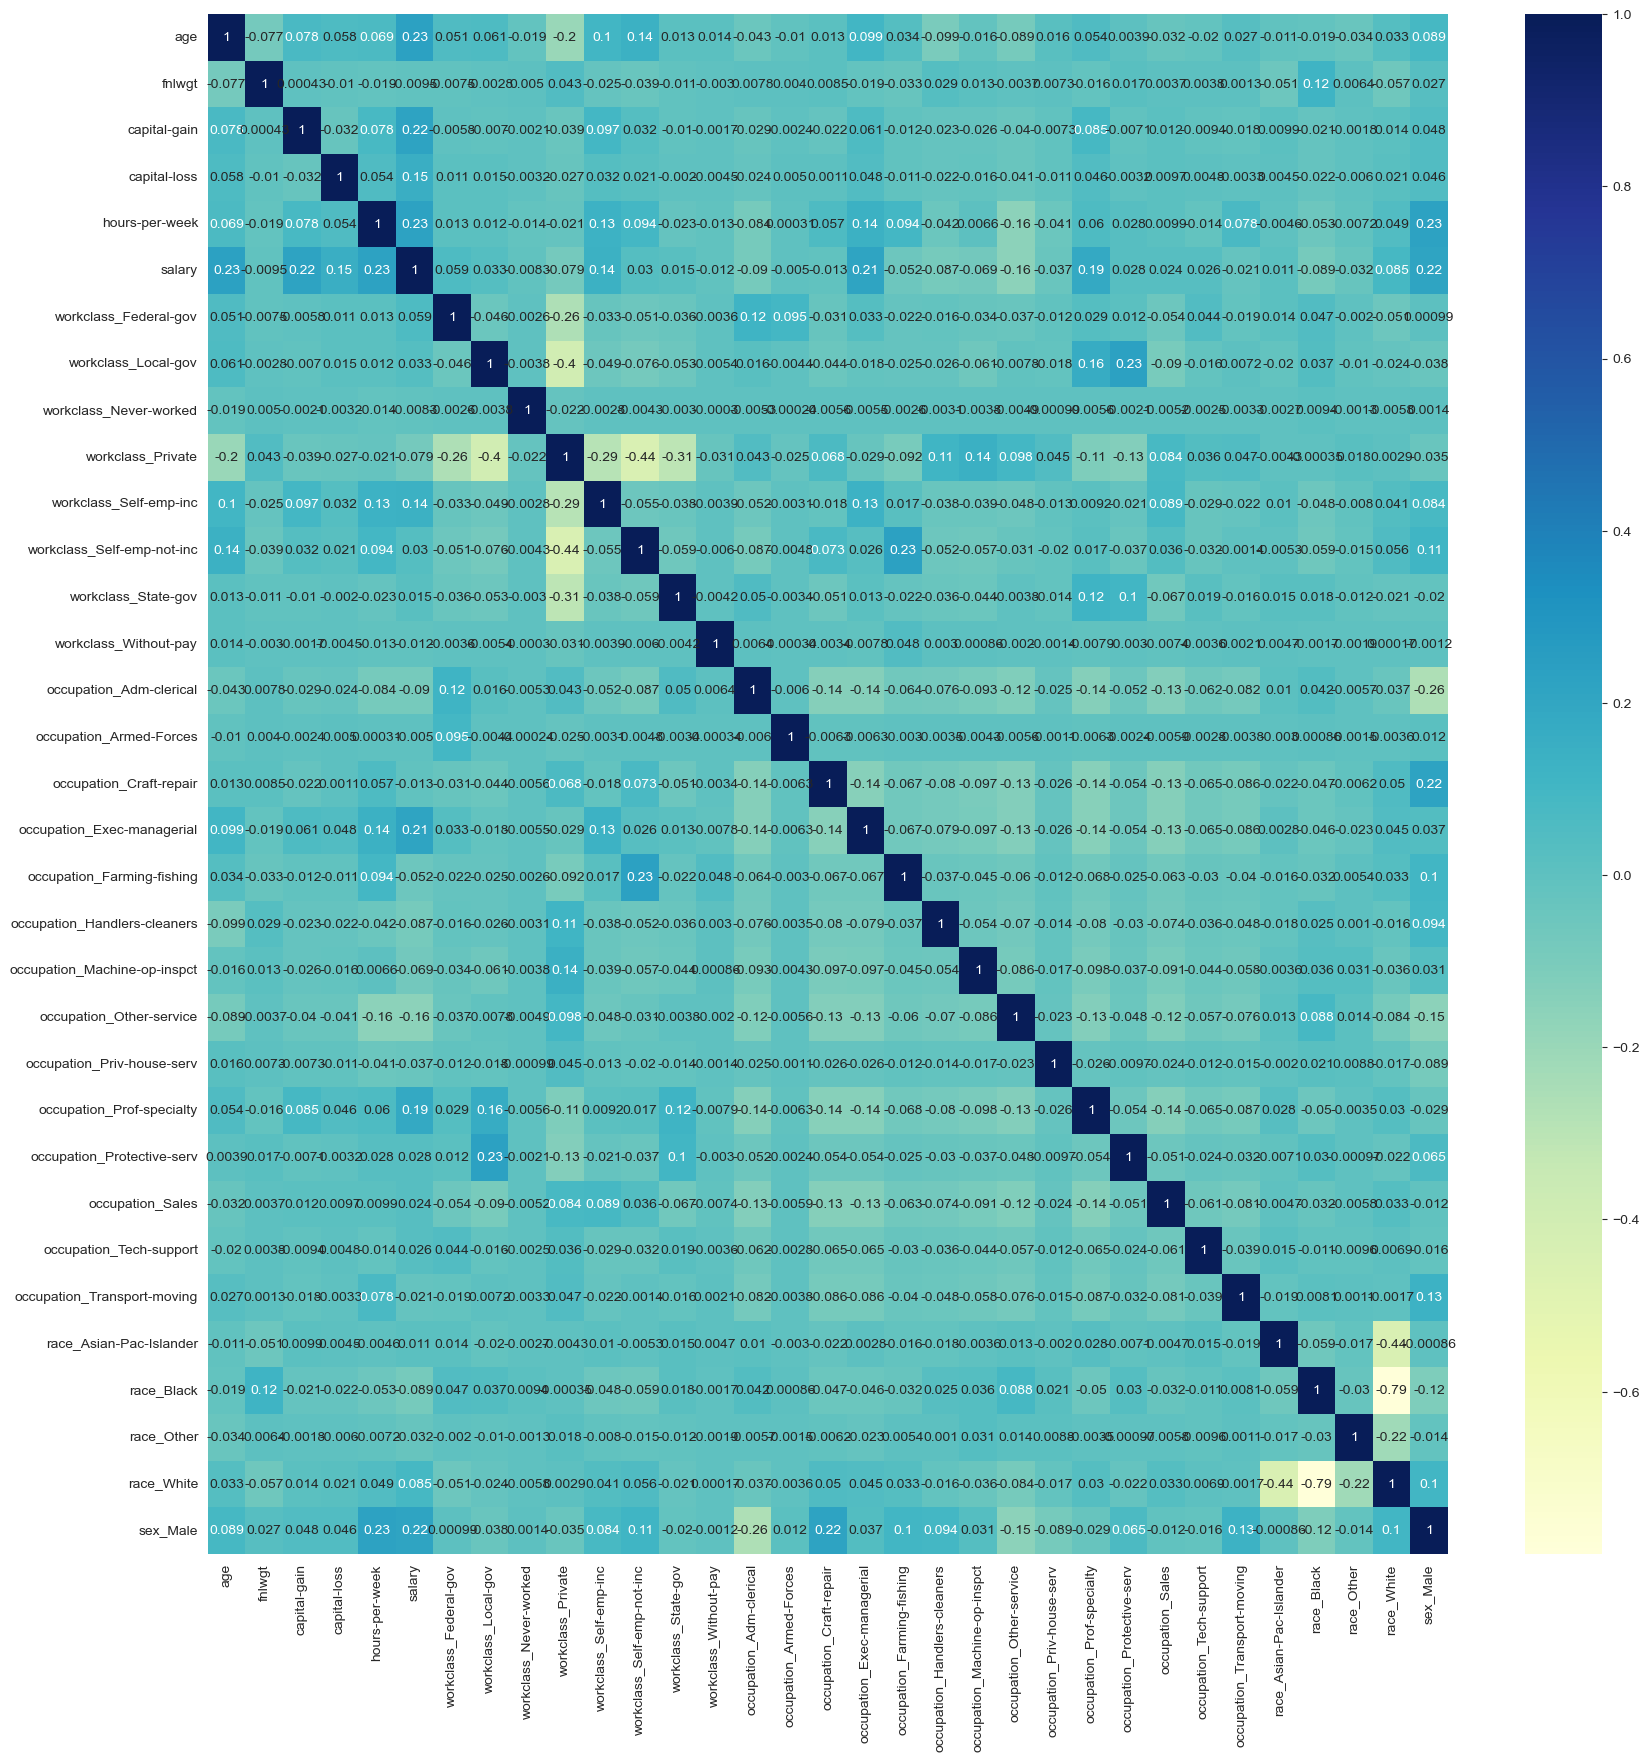

In [289]:
plt.figure(figsize=(20,20))
sns.heatmap(df_dummy.corr(), annot=df_dummy.corr().values, cmap="YlGnBu");

In [290]:
df_dummy_corr_salary = df_dummy.corr()[["salary"]].drop("salary").sort_values(by = "salary", ascending=False)
df_dummy_corr_salary

,salary
age,0.234
hours-per-week,0.230
capital-gain,0.223
sex_Male,0.216
occupation_Exec-managerial,0.215
occupation_Prof-specialty,0.186
capital-loss,0.151
workclass_Self-emp-inc,0.139
race_White,0.085
workclass_Federal-gov,0.059


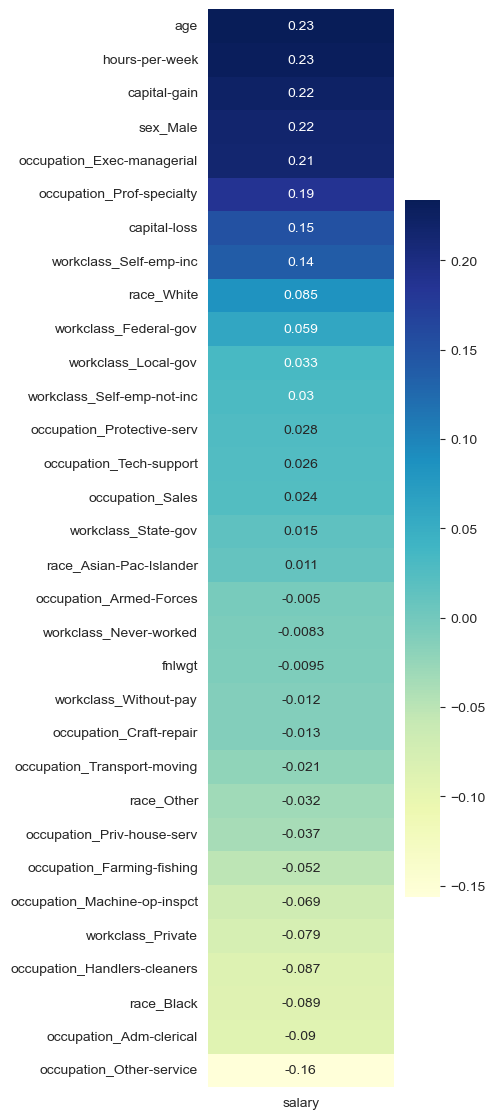

In [291]:
plt.figure(figsize=(3,14))

sns.heatmap(df_dummy_corr_salary, annot=True, cmap="YlGnBu");

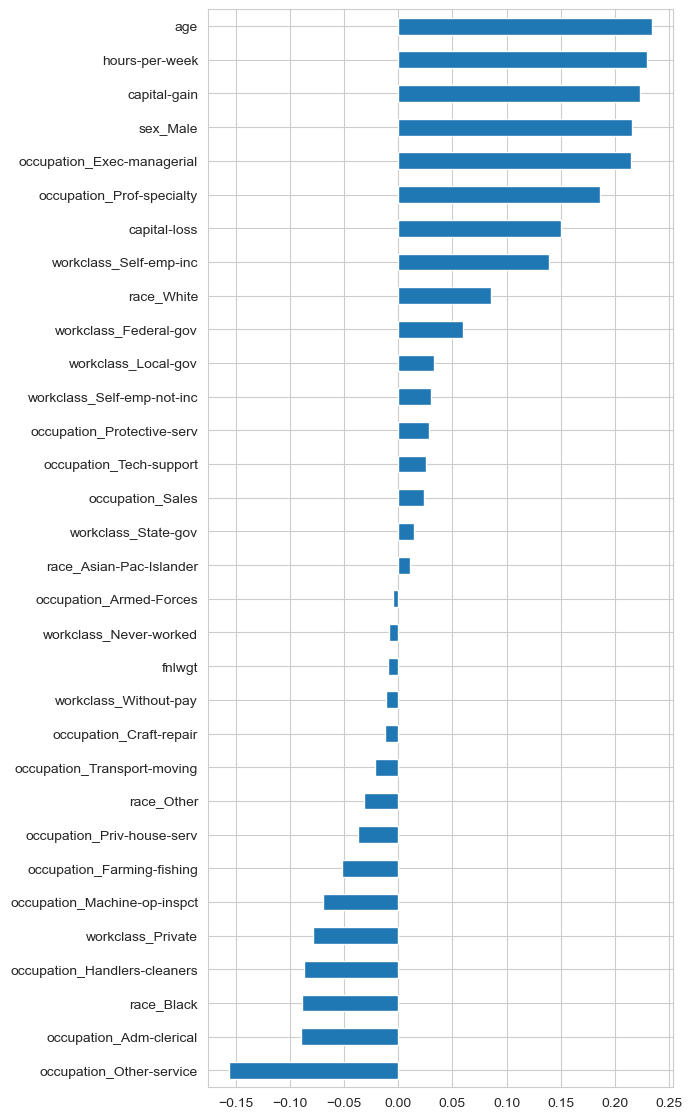

In [292]:
plt.figure(figsize=(6,14))
df_dummy.corr()["salary"].drop("salary").sort_values().plot.barh();

In [444]:
df =pd.read_csv("adult_eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [445]:

print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['relationship','education-num']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [446]:
hrs_per_week = df[df['hours-per-week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 85


In [447]:
# drop rows with age 90
print("Number of observation before removing:",df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [448]:
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [449]:
num_col_new = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital-status', 
               'race', 'sex', 'native-country', 'salary']

In [450]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df[num_col_new]),columns = num_col_new).head(3)

,age,capital-gain,capital-loss,hours-per-week,fnlwgt
0,0.310,0.053,0.000,0.398,0.044
1,0.465,0.000,0.000,0.122,0.048
2,0.296,0.000,0.000,0.398,0.138


In [451]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [452]:
num_df = pipeline.fit_transform(df)
num_df.shape

(32359, 5)

In [453]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','salary']

In [454]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(df)
cat_df.shape

(32359, 80)

In [455]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [456]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (32159, 86)


In [457]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32159 entries, 0 to 32158
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   education_10th                             32159 non-null  bool   
 1   education_11th                             32159 non-null  bool   
 2   education_12th                             32159 non-null  bool   
 3   education_1st-4th                          32159 non-null  bool   
 4   education_5th-6th                          32159 non-null  bool   
 5   education_7th-8th                          32159 non-null  bool   
 6   education_9th                              32159 non-null  bool   
 7   education_Assoc-acdm                       32159 non-null  bool   
 8   education_Assoc-voc                        32159 non-null  bool   
 9   education_Bachelors                        32159 non-null  bool   
 10  education_Doctorate   

In [459]:
y = final_df['salary_<=50K']
final_df.drop(labels = ['id','salary_<=50K'],axis = 1,inplace = True)
X = final_df

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [460]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [443]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [386]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    

## <p style="font-size:155%; text-align:center; border-radius:10px 10px;">Summary</p>

- Some columns are duplicated. By using drop_duplicates. It can be removed
- It seem there is some features are duplicated. ex: education and education_num It'll be drop. But I'll also use it to build the relation table. By checking that table, it'll be more clear.
- The fnlwgt is also can be drop. Because it's only the ID of agent.
- There is some N/A valus and will dropped.
- From the previous result, it seems 75.9% of the citizens are at the low-income level, 24.1% are at the high-income level.
- The age hs strong relationship with salary
- The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young
- There is no significant difference between high and low-income groups according to the "fnlwgt" feature.
- The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".
- There is no significant difference between high and low-income groups according to the "capital_loss" feature.
- To be in a high-income group, almost at least 40 hours working per week is required. Most of those who work less than 40 hours per week are in the low-income group.
- "Self-emp-inc" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the high-income group about high-level income.
- "United States" has a high ratio of high-level income both in the self group and in the high-income group.
- It seems that there is no missing value.
- After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.
- So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.
- There are others ML model, such like DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive..etc. There has many model to imporve the result. Because of the schedule, I only do the liner regression & multi-liner regression.